<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/%E9%95%B7%E6%A2%9D%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Load df1

In [55]:
df1 = pd.read_csv('/content/drive/MyDrive/廢水案子/ALLdataset.csv',index_col = 0)
df1

,site,cindex,cName,classification,confidence,D
date,,,,,,
20210927,T753,101,輪蟲幼蟲,101_輪蟲幼蟲,0.371431,39.638027
20210927,T753,116,絲狀菌,116_絲狀菌,0.996904,18.817467
20210927,T753,100,NaN,100,0.680799,96.061060
20210927,T753,125,膜袋蟲,125_膜袋蟲,0.828820,35.845880
20210927,T753,100,NaN,100,0.696207,77.641043
...,...,...,...,...,...,...
20230216,T753,100,NaN,100,1.000000,175.106430
20230216,T753,100,NaN,100,1.000000,101.303771
20230216,T753,100,NaN,100,1.000000,374.445880


# Load df2

In [56]:
def load_df2():
  path = '/content/drive/MyDrive/專案工作承攬契約書_廢水生物處理/2.20210101-20220430資料(整理).xlsx'
  df = pd.read_excel(path,index_col=0)
  var1 = df.iloc[0,:].values
  var2 = df.iloc[1,:].values
  專有名詞對照表 = pd.concat([pd.Series(var1), pd.Series(var2)], axis=1).T
  專有名詞對照表.index = ['詳細名稱', '英文名稱']
  # 指定第一行為欄位名稱
  df.columns = df.iloc[1]  
  # 去掉前兩行因為是欄位名稱
  df = df.iloc[2:]  
  # cell都轉換成numeric
  for i in df.columns:
    df[i] = pd.to_numeric(df[i],errors='coerce')
  return df,專有名詞對照表
df2,專有名詞對照表 = load_df2()
df2.index = pd.to_datetime(df2.index).strftime('%Y%m%d').astype(df1.index)
df2

日期,PHL-WS-FI7C01_PV,PHL-WS-AT7C03_PV,PHL-WS-AT7C02_PV,PHL-WS-TT7C09_PV,PHL-WS-T752-LEVEL_PV,PHL-WS-FIT7C04_PV,PHL-WS-FI7E01_PV,T-752食微比,PHL-WS-FI7C05_PV,PHL_T751-COD_ppm,...,PHL_A771-COD_ppm,PHL_A771-SS,PHL_A771-PHL,PHL_S7511-PO4,PHL_S7512-PO4,PHL_S7511-NH3,PHL_S7512-NH3,PHL_T751-pH,PHL_S7512-pH,PHL_A771-pH
20210101,30.954139,2.748208,13454.707783,30.738966,82.837878,1322.159831,171.755781,0.074793,7.920856,2366.666667,...,41.000000,12.833333,0.0,21.633334,2.386667,20.550000,0.891667,7.700000,8.083334,8.383333
20210102,31.155222,2.503246,13309.705981,30.492182,82.828679,1299.586141,175.419489,0.085769,7.951025,2696.666667,...,38.333333,12.333333,0.0,22.270000,2.010000,20.601111,0.446667,7.716667,8.000000,8.300000
20210103,30.948144,2.119857,13312.370351,30.441738,82.883022,1275.992065,169.424186,0.085614,7.895686,2710.000000,...,42.333333,14.500000,0.0,24.310001,1.871667,19.680000,0.171667,7.850000,8.016667,8.316667
20210104,33.247575,1.300810,13396.259431,30.483045,82.905756,1298.938517,208.076129,0.097059,7.904003,2860.000000,...,49.666667,16.500000,0.0,22.606667,1.431667,19.422222,0.144444,8.116667,8.083334,8.400000
20210105,32.230836,1.900386,13604.773082,30.641047,82.901661,1334.388753,182.204378,0.095510,7.937889,2903.333333,...,37.666667,14.000000,0.0,21.743333,1.405000,19.848888,0.172222,8.183333,8.016667,8.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220426,39.947576,1.632956,13778.719592,40.284236,82.138722,1534.251369,200.641541,0.116615,-0.033719,2213.560000,...,49.140000,6.461538,0.0,16.188000,2.337000,34.438888,0.237222,7.633846,7.810000,8.310000
20220427,38.524569,1.619828,13838.553847,40.583724,82.098759,1532.456603,190.895455,0.115005,-0.033638,2271.880000,...,50.220000,6.500000,0.0,15.324000,2.151000,34.005555,0.233889,7.765000,7.760000,8.285000
20220428,36.809783,1.645253,13813.169294,40.412546,82.117266,1526.493705,196.933991,0.112299,-0.033809,2330.200000,...,51.300000,7.500000,0.0,14.460000,1.965000,33.572222,0.230556,7.815000,7.733333,8.263333
20220429,35.945983,1.758189,13622.316753,39.928740,82.106717,1526.142494,188.211287,0.112004,-0.032991,2388.520000,...,52.380000,8.500000,0.0,13.596000,1.779000,33.138889,0.227222,7.685000,7.780000,8.270000


In [57]:
專有名詞對照表.T

,詳細名稱,英文名稱
0,T752入料量,PHL-WS-FI7C01_PV
1,T752溶氧,PHL-WS-AT7C03_PV
2,T752導電度計,PHL-WS-AT7C02_PV
3,T752溫度,PHL-WS-TT7C09_PV
4,T752 液位,PHL-WS-T752-LEVEL_PV
5,T752曝氣量,PHL-WS-FIT7C04_PV
6,放流水量,PHL-WS-FI7E01_PV
7,T-752食微比,T-752食微比
8,T752排泥量,PHL-WS-FI7C05_PV
9,T751COD濃度,PHL_T751-COD_ppm


# 將df1 df2合併成df

In [58]:
df = df1.join(df2)
df

,site,cindex,cName,classification,confidence,D,PHL-WS-FI7C01_PV,PHL-WS-AT7C03_PV,PHL-WS-AT7C02_PV,PHL-WS-TT7C09_PV,...,PHL_A771-COD_ppm,PHL_A771-SS,PHL_A771-PHL,PHL_S7511-PO4,PHL_S7512-PO4,PHL_S7511-NH3,PHL_S7512-NH3,PHL_T751-pH,PHL_S7512-pH,PHL_A771-pH
20210927,T753,101,輪蟲幼蟲,101_輪蟲幼蟲,0.371431,39.638027,32.166868,0.698399,14051.069547,38.956273,...,43.166667,10.0,0.0,20.266667,3.365,20.572223,0.303333,7.883333,8.233333,8.433333
20210927,T753,116,絲狀菌,116_絲狀菌,0.996904,18.817467,32.166868,0.698399,14051.069547,38.956273,...,43.166667,10.0,0.0,20.266667,3.365,20.572223,0.303333,7.883333,8.233333,8.433333
20210927,T753,100,NaN,100,0.680799,96.061060,32.166868,0.698399,14051.069547,38.956273,...,43.166667,10.0,0.0,20.266667,3.365,20.572223,0.303333,7.883333,8.233333,8.433333
20210927,T753,125,膜袋蟲,125_膜袋蟲,0.828820,35.845880,32.166868,0.698399,14051.069547,38.956273,...,43.166667,10.0,0.0,20.266667,3.365,20.572223,0.303333,7.883333,8.233333,8.433333
20210927,T753,100,NaN,100,0.696207,77.641043,32.166868,0.698399,14051.069547,38.956273,...,43.166667,10.0,0.0,20.266667,3.365,20.572223,0.303333,7.883333,8.233333,8.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230216,T753,100,NaN,100,1.000000,175.106430,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20230216,T753,100,NaN,100,1.000000,101.303771,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20230216,T753,100,NaN,100,1.000000,374.445880,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20230216,T753,100,NaN,100,1.000000,63.488342,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 保留需要欄位

In [59]:
need_cols = ['cName','D','PHL_T751-COD_ppm','PHL_A771-COD_ppm']
df = df.loc[:,need_cols]
df

,cName,D,PHL_T751-COD_ppm,PHL_A771-COD_ppm
20210927,輪蟲幼蟲,39.638027,2776.666667,43.166667
20210927,絲狀菌,18.817467,2776.666667,43.166667
20210927,NaN,96.061060,2776.666667,43.166667
20210927,膜袋蟲,35.845880,2776.666667,43.166667
20210927,NaN,77.641043,2776.666667,43.166667
...,...,...,...,...
20230216,NaN,175.106430,NaN,NaN
20230216,NaN,101.303771,NaN,NaN
20230216,NaN,374.445880,NaN,NaN
20230216,NaN,63.488342,NaN,NaN


# 刪除有缺失的row

In [60]:
df = df.dropna(axis=0)
df

,cName,D,PHL_T751-COD_ppm,PHL_A771-COD_ppm
20210927,輪蟲幼蟲,39.638027,2776.666667,43.166667
20210927,絲狀菌,18.817467,2776.666667,43.166667
20210927,膜袋蟲,35.845880,2776.666667,43.166667
20210927,絲狀菌,32.625321,2776.666667,43.166667
20210927,絲狀菌,22.131402,2776.666667,43.166667
...,...,...,...,...
20220429,太陽蟲,30.405082,2388.520000,52.380000
20220429,絲狀菌,31.968808,2388.520000,52.380000
20220429,太陽蟲,90.186645,2388.520000,52.380000
20220429,絲狀菌,25.094651,2388.520000,52.380000


# 先挑出其中一個種類的蟲的資料

In [61]:
df_輪蟲幼蟲 = df.loc[df['cName']=='輪蟲幼蟲']
df_輪蟲幼蟲

,cName,D,PHL_T751-COD_ppm,PHL_A771-COD_ppm
20210927,輪蟲幼蟲,39.638027,2776.666667,43.166667
20210927,輪蟲幼蟲,40.248492,2776.666667,43.166667
20210927,輪蟲幼蟲,38.525825,2776.666667,43.166667
20210927,輪蟲幼蟲,37.323780,2776.666667,43.166667
20210927,輪蟲幼蟲,31.835881,2776.666667,43.166667
...,...,...,...,...
20220429,輪蟲幼蟲,255.381266,2388.520000,52.380000
20220429,輪蟲幼蟲,37.493820,2388.520000,52.380000
20220429,輪蟲幼蟲,111.876616,2388.520000,52.380000
20220429,輪蟲幼蟲,332.156200,2388.520000,52.380000


# 彙總成10天一筆

In [62]:
df_輪蟲幼蟲.index = pd.to_datetime(df_輪蟲幼蟲.index, format='%Y%m%d')
df_輪蟲幼蟲

,cName,D,PHL_T751-COD_ppm,PHL_A771-COD_ppm
2021-09-27,輪蟲幼蟲,39.638027,2776.666667,43.166667
2021-09-27,輪蟲幼蟲,40.248492,2776.666667,43.166667
2021-09-27,輪蟲幼蟲,38.525825,2776.666667,43.166667
2021-09-27,輪蟲幼蟲,37.323780,2776.666667,43.166667
2021-09-27,輪蟲幼蟲,31.835881,2776.666667,43.166667
...,...,...,...,...
2022-04-29,輪蟲幼蟲,255.381266,2388.520000,52.380000
2022-04-29,輪蟲幼蟲,37.493820,2388.520000,52.380000
2022-04-29,輪蟲幼蟲,111.876616,2388.520000,52.380000
2022-04-29,輪蟲幼蟲,332.156200,2388.520000,52.380000


In [63]:
df_10days = df_輪蟲幼蟲.resample('10D').mean()
df_10days

,D,PHL_T751-COD_ppm,PHL_A771-COD_ppm
2021-09-27,35.463654,2629.946257,42.105758
2021-10-07,47.259416,2469.125048,39.815137
2021-10-17,65.264455,2866.260325,41.126166
2021-10-27,62.569420,2594.542181,44.207305
2021-11-06,62.686998,2197.277856,42.941702
2021-11-16,59.572828,2186.148372,38.624275
2021-11-26,56.135389,2141.624022,39.142598
2021-12-06,54.293967,2182.149123,41.011696
2021-12-16,54.175613,1940.670611,39.165352
2021-12-26,55.667227,1911.168385,40.896048


# 計算COD 差異量

In [66]:
df_10days['COD差異量'] = df_10days['PHL_T751-COD_ppm']-df_10days['PHL_A771-COD_ppm']
df_10days

,D,PHL_T751-COD_ppm,PHL_A771-COD_ppm,COD差異量
2021-09-27,35.463654,2629.946257,42.105758,2587.840499
2021-10-07,47.259416,2469.125048,39.815137,2429.309911
2021-10-17,65.264455,2866.260325,41.126166,2825.134159
2021-10-27,62.569420,2594.542181,44.207305,2550.334877
2021-11-06,62.686998,2197.277856,42.941702,2154.336154
2021-11-16,59.572828,2186.148372,38.624275,2147.524098
2021-11-26,56.135389,2141.624022,39.142598,2102.481425
2021-12-06,54.293967,2182.149123,41.011696,2141.137427
2021-12-16,54.175613,1940.670611,39.165352,1901.505260
2021-12-26,55.667227,1911.168385,40.896048,1870.272337


# 根據D值分群

In [67]:
quantiles = [i / 10.0 for i in range(11)]
d_quantiles = df_10days['D'].quantile(quantiles)
def label_function(value):
    for i, quantile in enumerate(d_quantiles):
        if value <= quantile:
            return i
    return len(d_quantiles)  # 如果數值大於最大的十分位數，則標註為最大的區間
df_10days['根據D值分群標註'] = df_10days['D'].apply(label_function)
df_10days

,D,PHL_T751-COD_ppm,PHL_A771-COD_ppm,COD差異量,根據D值分群標註
2021-09-27,35.463654,2629.946257,42.105758,2587.840499,0
2021-10-07,47.259416,2469.125048,39.815137,2429.309911,1
2021-10-17,65.264455,2866.260325,41.126166,2825.134159,9
2021-10-27,62.569420,2594.542181,44.207305,2550.334877,8
2021-11-06,62.686998,2197.277856,42.941702,2154.336154,9
2021-11-16,59.572828,2186.148372,38.624275,2147.524098,8
2021-11-26,56.135389,2141.624022,39.142598,2102.481425,5
2021-12-06,54.293967,2182.149123,41.011696,2141.137427,2
2021-12-16,54.175613,1940.670611,39.165352,1901.505260,2
2021-12-26,55.667227,1911.168385,40.896048,1870.272337,4


# 繪製長條圖

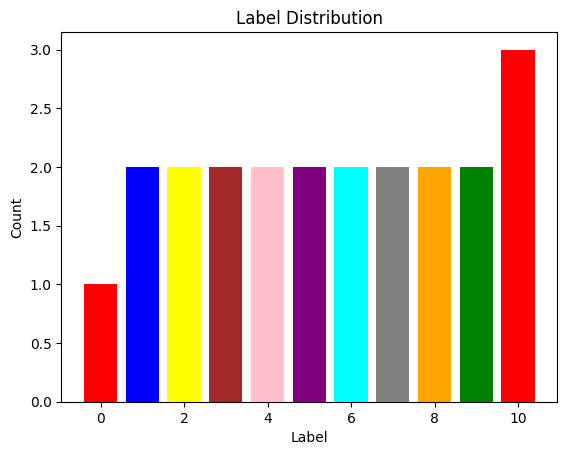

In [75]:
df = df_10days

# 計算每個類別的數量
label_counts = df['根據D值分群標註'].value_counts()

# 設定顏色
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'gray', 'brown', 'cyan']

# 繪製長條圖
plt.bar(label_counts.index, label_counts.values, color=colors)

# 設定圖表標題和軸標籤
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# 顯示圖表
plt.show()
